In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)

In [2]:
# 종, color 별 count
folder_list = os.listdir('dogs_breed_color')
breed = []
color = []
count = []
for folder in folder_list:
    breed.append(' '.join(folder.split('_')[1:-1]))
    color.append(folder.split('_')[-1])
    count.append(len(os.listdir(os.path.join('dogs_breed_color', folder))))

In [3]:
# to dataframe
df = pd.DataFrame([breed, color, count]).T
df.columns = ['breed', 'color', 'count']
df = df.sort_values(by=['breed'], axis=0).reset_index().drop('index', axis=1)

In [4]:
df['color_in_breed_ratio'] = df['count']/df.groupby('breed')['count'].sum().loc[df['breed']].values*100 # 품종 내 color 비중
df['breed_in_color_ratio'] = df['count']/df.groupby('color')['count'].sum().loc[df['color']].values*100 # color 내 품종 비중
df.set_index(['breed', 'color'])

count color_in_breed_ratio  \
breed                   color                                  
AMERICAN COCKER SPANIEL black       156              35.1351   
                        brown       102               22.973   
                        brown-mix   104              23.4234   
                        dark-mix     56              12.6126   
                        white        26              5.85586   
BEDLINGTON TERRIER      white       158              87.2928   
                        dark-mix     23              12.7072   
BICHON FRISE            white       105                  100   
BULLDOG                 black-mix   174              43.9394   
                        brown        13              3.28283   
                        brown-mix   140              35.3535   
                        white        69              17.4242   
CAVALIER COCKER SPANIEL brown-mix   188                  100   
CHIHUAHUA               black        15              3.28947   
                        brown-mix   227              49.7807   
                        brown        71              15.5702   
                        black-mix    76              16.6667   
                        white        67               14.693   
CHOW CHOW               black        22              6.79012   
                        brown       256              79.0123   
                        white        46              14.1975   
DOBERMANN               black       290                  100   
FRENCH BULLDOG          white        28                 11.2   
                        black       104                 41.6   
                        brown        50                   20   
                        mix          68                 27.2   
GERMAN SHEPHERD DOG     light        18              6.40569   
                        dark-mix    263              93.5943   
GOLDEN RETRIEVER        light        60              21.6606   
                        brown       217              78.3394   
HUSKY                   light       109              41.6031   
                        dark        153              58.3969   
ITALIAN GREY HOUND      black        19              6.66667   
                        mix         221              77.5439   
                        brown        45              15.7895   
KOREA JINDO DOG         brown       340              35.3798   
                        black       171               17.794   
                        white       450              46.8262   
LABRADOR RETRIEVER      mix          25              14.9701   
                        white        42              25.1497   
                        brown        34              20.3593   
                        black        66               39.521   
MALTESE                 white       381                  100   
PEKINGESE               white        60              24.3902   
                        brown       123                   50   
                        black        12              4.87805   
                        mix          51              20.7317   
POMERANIAN              white        80              14.0845   
                        mix          30              5.28169   
                        brown       436              76.7606   
                        black        22              3.87324   
PUG                     black        55              9.75177   
                        mix         509              90.2482   
ROTTWEILER              black       250                  100   
SAMOYED                 white       418                  100   
SHETLAND SHEEPDOG       brown-mix    70               44.586   
                        dark-mix     61              38.8535   
                        black-mix    26              16.5605   
SHIBA                   dark-mix      9              3.02013   
                        brown-mix   283              94.9664   
                        white         6              2.01342   
SH

In [5]:
# 전체 품종별 비율
breedratio = pd.DataFrame(df.groupby('breed')['count'].sum()).reset_index()
breedratio['ratio'] = breedratio['count']/breedratio['count'].sum()*100
breedratio.sort_values(by=['ratio'], ascending=False, axis=0)

,breed,count,ratio
13,KOREA JINDO DOG,961,10.618785
17,POMERANIAN,568,6.276243
18,PUG,564,6.232044
5,CHIHUAHUA,456,5.038674
0,AMERICAN COCKER SPANIEL,444,4.906077
20,SAMOYED,418,4.618785
23,SHIH TZU,411,4.541436
3,BULLDOG,396,4.375691
15,MALTESE,381,4.209945
27,YORKSHIRE TERRIER,364,4.022099


In [6]:
# 전체 color 비율
colorratio = pd.DataFrame(df.groupby('color')['count'].sum()).reset_index()
colorratio['ratio'] = colorratio['count']/colorratio['count'].sum()*100
colorratio.sort_values(by=['ratio'], ascending=False, axis=0)

,color,count,ratio
9,white,2155,23.812155
2,brown,1778,19.646409
8,mix,1311,14.486188
0,black,1292,14.276243
3,brown-mix,1049,11.591160
5,dark-mix,465,5.138122
7,mild,309,3.414365
1,black-mix,276,3.049724
4,dark,208,2.298343
6,light,207,2.287293


<Figure size 2880x2880 with 0 Axes>

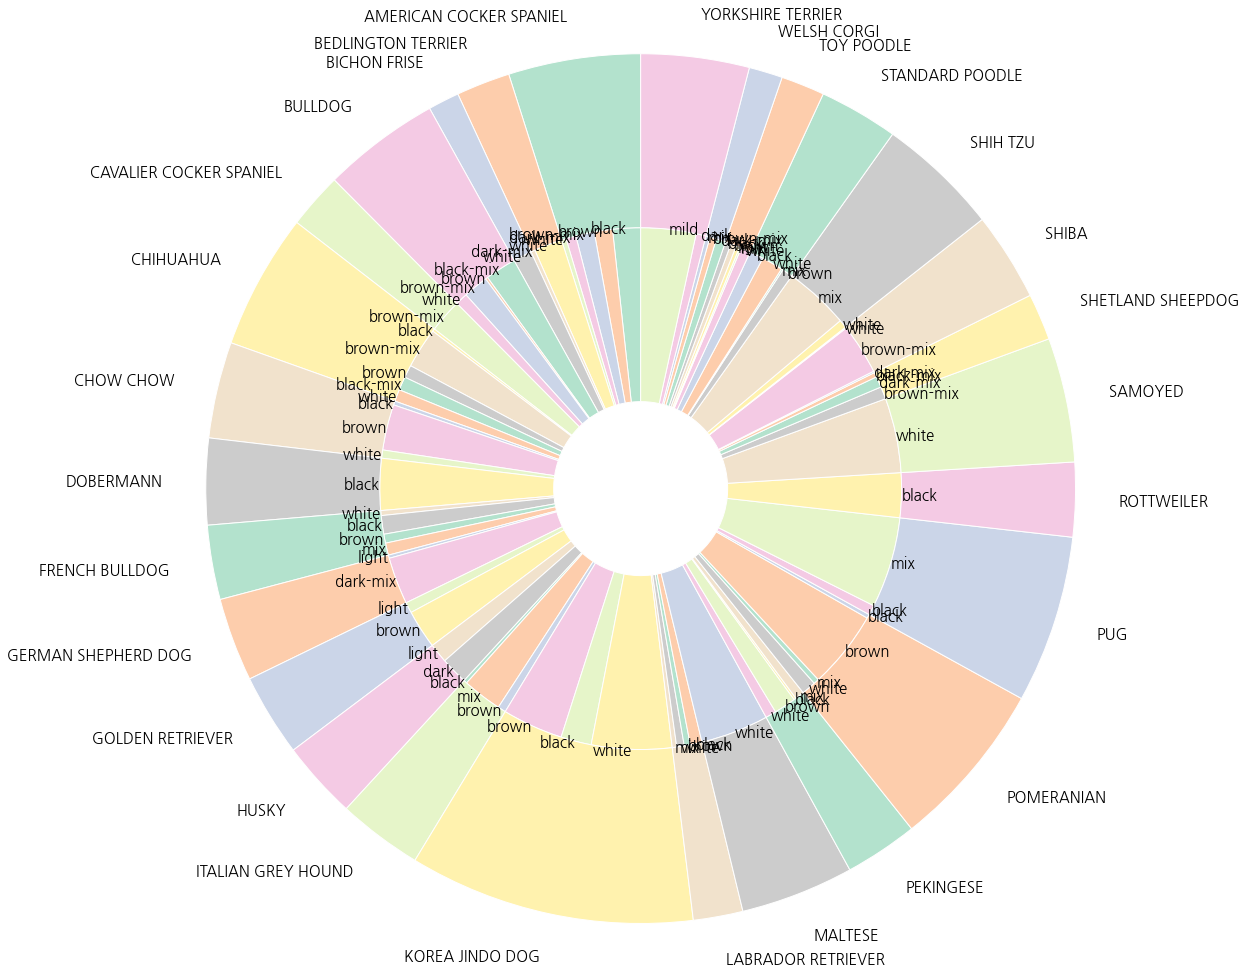

In [7]:
# donut graph
plt.figure(figsize=(40, 40))
plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 15
fig, ax = plt.subplots()
size = 2

cmap = plt.get_cmap("Pastel2")
outer_colors = cmap(np.arange(8))
inner_colors = cmap(np.arange(8))

temp = pd.DataFrame(df.groupby('breed')['count'].sum()).reset_index()

# 각 품종 내 color
ax.pie(df['count'], labels=df['color'], radius=5-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), labeldistance=1, startangle=90)

# 전체 품종
ax.pie(temp['count'], labels=temp['breed'], radius=5, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), startangle=90)

plt.show()